In [262]:
# Necessary imports
#! pip install sklearn
import pandas as pd
import numpy as np
import pandas as pd
import datetime as dt
import plotly.express as px
import seaborn as sns 

import requests



#ML libraries
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE


ImportError: cannot import name 'mean_absolute_percentage_error'

In [271]:
def MAPE(predicted, actual): 
    error = actual-predicted
    abs_error = np.abs(error)
    abs_perc_error = (abs_error/actual)*100
    print('--------------------------------')
    print('Testing Model Absolute Percentage error (APE)')
    print(f'Median APE (MAPE) = {abs_perc_error.median():.2f}%')
    print(f'Mean APE  = {abs_perc_error.mean():.2f} %')
    print(f"25th percentile APE = {abs_perc_error.quantile(q=0.25):.2f} %")
    print(f"75th percentile APE = {abs_perc_error.quantile(q=0.75):.2f} %")


In [72]:
# defince a constant for the sol base unit of 1000000000
SOL_BASE = 1000000000


## Import Traits/Rarity Data 

In [108]:
bears_rarity = pd.read_csv("./data/okay_bear/OkayBears_traits.csv")
bears_trait_list = ['Background',	'Clothes','Eyes','Eyewear','Fur','Hat','Mouth']

bears_rarity.head(2)

,name,Background,Clothes,Eyes,Eyewear,Fur,Hat,Mouth,Background_rarity,Clothes_rarity,...,Eyewear_rarity,Fur_rarity,Hat_rarity,Mouth_rarity,mint,rarity_rank,overall_rarity,min_rarity,mean_rarity,trait_n
0,Okay Bear #3340,White,Hawaiian Shirt,Interested,Holographic,Coral,Mumford Hat,Yoyo,12.65,1.78,...,1.71,0.72,1.75,0.48,EK4FizYeActi1CAt4j48Qb5bNsY38RLydnugsvvaj57e,1,1.562575e-12,0.48,3.685714,7
1,Okay Bear #8003,Blue,Camel Coat,Wide Eyed,Mechanical Goggles,Panda,Chullo,Gah,12.52,1.16,...,0.51,3.90,0.78,4.26,FLgY55Ras6nLdwQmDRbnSL7Bxe9FEAqLHTPz3qyUdKWr,2,2.495598e-12,0.51,3.675714,7


In [110]:
rarity_cols = ['mint','Background_rarity', 'Clothes_rarity', 'Eyes_rarity',
       'Eyewear_rarity', 'Fur_rarity', 'Hat_rarity', 'Mouth_rarity',
       'rarity_rank', 'overall_rarity', 'min_rarity', 'mean_rarity',
       'trait_n']



Index(['name', 'Background', 'Clothes', 'Eyes', 'Eyewear', 'Fur', 'Hat',
       'Mouth', 'Background_rarity', 'Clothes_rarity', 'Eyes_rarity',
       'Eyewear_rarity', 'Fur_rarity', 'Hat_rarity', 'Mouth_rarity', 'mint',
       'rarity_rank', 'overall_rarity', 'min_rarity', 'mean_rarity',
       'trait_n'],
      dtype='object')

In [212]:
sales_original = pd.read_csv("./data/okay_bear/transactions.csv")
original_n = sales_original.shape[0]

sales = sales_original.drop_duplicates(subset=['blockTime','tokenMint','price'])
unique_n = sales.shape[0]

print(f"Inputted {original_n} sales records, {unique_n}, of which are unique")


Inputted 17233 sales records, 17233, of which are unique


In [213]:
# convert trade time to datetime from epoch
sales["blockTime"] = pd.to_datetime(sales["blockTime"], unit="s")
sales['log2_price'] = np.log2(sales.price)
sales.head(7)

,Unnamed: 0,signature,type,source,tokenMint,collection,slot,blockTime,buyer,buyerReferral,seller,sellerReferral,price,log2_price
0,0,43FoEW3r6Fb8Rsee9U7rvuWmfJqzhsU1Grofh16dAXUFX5...,buyNow,magiceden_v2,5vFz8He4i2D3jnLmxRzsuBe3xxGc94z2tGfgqQwRuw3y,okay_bears,137871915,2022-06-17 10:01:01,9S33kgnFmgKLApEe4eWLxNqQ9Aj9RwTVC7iLSEU3Skwg,NaN,9fP7Qhn61jaRsLtoamAoPyiTUwpfTArK2RTUYqcmJxqQ,NaN,94.0,6.554589
1,1,4eDVHjTSNp7nXdAiZP9Li9vscHBg9Q3f1d8mm3WvraYqi2...,buyNow,magiceden_v2,9tMBuTd6Uyz63MuvnauXQuAGnxbGEfSXRbGpN9G1LZNw,okay_bears,137871285,2022-06-17 09:53:47,2oiSvotL58bSsybx2XzGdW3Z42855L9EswGjntjWXtKW,NaN,BSVTGZh5SK1DaNTe4NkAwBPe3dBBfHp1MM6Tfrrj751d,NaN,98.0,6.614710
2,2,4NrDYLaMYdb1NgcA2XFg8ZsmzJWg5krcXMAQikgGwCF2SU...,buyNow,magiceden_v2,3TvE7quEo2nZLyrnZJMaUtRDFCX8vRyTG9Cd6iXob4SS,okay_bears,137869240,2022-06-17 09:30:18,2oiSvotL58bSsybx2XzGdW3Z42855L9EswGjntjWXtKW,NaN,wxo1Rj8JAy52FhhqTSiPTNbGZH87RhyMrgKJZiyYcay,NaN,98.0,6.614710
3,3,3BzWwYVcznigJNuYGic2UguE4pbkWNe6HitDUCw6dwEhbY...,buyNow,magiceden_v2,C8y5dPAECStdXd1aWeLuUNnU2L25CxfMrpN98aitTesf,okay_bears,137869085,2022-06-17 09:28:25,2oiSvotL58bSsybx2XzGdW3Z42855L9EswGjntjWXtKW,NaN,unWyHtrW6woZcfj7PJmasxuYN9oXFeUUQH9tBxCA1sM,NaN,104.0,6.700440
4,4,263yfTCaMW5ms21TzDhmWB9r8tFEVWi5DVumiEaszBvEh4...,buyNow,magiceden_v2,6UGdwKmxBGcaoPDb5ntGZbY9ojsVogNpMBufJA76e3Xj,okay_bears,137869042,2022-06-17 09:27:53,2oiSvotL58bSsybx2XzGdW3Z42855L9EswGjntjWXtKW,NaN,CDaoNJUNAmEYaGvPH6FrUGMt1GjyF5WD9RfULf2zZdVy,NaN,107.0,6.741467
5,5,44D6w3ELafCRzXkVmCBJKLhCBPYKE3wSauuXGnMMgz6EaQ...,buyNow,magiceden_v2,599HBAouUFGfpRgNzQJ42m9o4BCoUXhXiBYkDjzrvoj5,okay_bears,137868792,2022-06-17 09:24:52,2oiSvotL58bSsybx2XzGdW3Z42855L9EswGjntjWXtKW,NaN,F2SgJY1HLmw33qquQVF7oqG38GNDgQkxwXqbney4PvuB,NaN,99.9,6.642413
6,6,5YNWdQtrYkKfpJPqmTGRAKLzoEw4gdFtrC1PJaaRrwCDx4...,buyNow,magiceden_v2,FQnC99XFdbcrrBHF77XJUA15ecadiccXdsCzTpkytnJr,okay_bears,137868768,2022-06-17 09:24:37,2oiSvotL58bSsybx2XzGdW3Z42855L9EswGjntjWXtKW,NaN,EjawQWmh94JamZAYHFxrLZzfiqn2yTUAeGT8eGZNxkr4,NaN,100.0,6.643856


In [214]:
sales['day']=sales.blockTime.dt.date


In [215]:
#calculate daily sales average and daily floor (5th percentile of sales)

daily_SOL_median = pd.DataFrame(sales.groupby('day')['price'].median()).reset_index().rename(columns={'price':'daily_median_price'})
daily_floor = pd.DataFrame(sales.groupby('day')['price'].quantile(q=0.05)).reset_index().rename(columns={'price':'daily_median_floor'})
sales = sales.merge(daily_SOL_median, on='day',how='inner').merge(daily_floor,on='day',how='inner')
sales.head()
#daily_SOL_median

,Unnamed: 0,signature,type,source,tokenMint,collection,slot,blockTime,buyer,buyerReferral,seller,sellerReferral,price,log2_price,day,daily_median_price,daily_median_floor
0,0,43FoEW3r6Fb8Rsee9U7rvuWmfJqzhsU1Grofh16dAXUFX5...,buyNow,magiceden_v2,5vFz8He4i2D3jnLmxRzsuBe3xxGc94z2tGfgqQwRuw3y,okay_bears,137871915,2022-06-17 10:01:01,9S33kgnFmgKLApEe4eWLxNqQ9Aj9RwTVC7iLSEU3Skwg,NaN,9fP7Qhn61jaRsLtoamAoPyiTUwpfTArK2RTUYqcmJxqQ,NaN,94.0,6.554589,2022-06-17,99.45,91.5
1,1,4eDVHjTSNp7nXdAiZP9Li9vscHBg9Q3f1d8mm3WvraYqi2...,buyNow,magiceden_v2,9tMBuTd6Uyz63MuvnauXQuAGnxbGEfSXRbGpN9G1LZNw,okay_bears,137871285,2022-06-17 09:53:47,2oiSvotL58bSsybx2XzGdW3Z42855L9EswGjntjWXtKW,NaN,BSVTGZh5SK1DaNTe4NkAwBPe3dBBfHp1MM6Tfrrj751d,NaN,98.0,6.614710,2022-06-17,99.45,91.5
2,2,4NrDYLaMYdb1NgcA2XFg8ZsmzJWg5krcXMAQikgGwCF2SU...,buyNow,magiceden_v2,3TvE7quEo2nZLyrnZJMaUtRDFCX8vRyTG9Cd6iXob4SS,okay_bears,137869240,2022-06-17 09:30:18,2oiSvotL58bSsybx2XzGdW3Z42855L9EswGjntjWXtKW,NaN,wxo1Rj8JAy52FhhqTSiPTNbGZH87RhyMrgKJZiyYcay,NaN,98.0,6.614710,2022-06-17,99.45,91.5
3,3,3BzWwYVcznigJNuYGic2UguE4pbkWNe6HitDUCw6dwEhbY...,buyNow,magiceden_v2,C8y5dPAECStdXd1aWeLuUNnU2L25CxfMrpN98aitTesf,okay_bears,137869085,2022-06-17 09:28:25,2oiSvotL58bSsybx2XzGdW3Z42855L9EswGjntjWXtKW,NaN,unWyHtrW6woZcfj7PJmasxuYN9oXFeUUQH9tBxCA1sM,NaN,104.0,6.700440,2022-06-17,99.45,91.5
4,4,263yfTCaMW5ms21TzDhmWB9r8tFEVWi5DVumiEaszBvEh4...,buyNow,magiceden_v2,6UGdwKmxBGcaoPDb5ntGZbY9ojsVogNpMBufJA76e3Xj,okay_bears,137869042,2022-06-17 09:27:53,2oiSvotL58bSsybx2XzGdW3Z42855L9EswGjntjWXtKW,NaN,CDaoNJUNAmEYaGvPH6FrUGMt1GjyF5WD9RfULf2zZdVy,NaN,107.0,6.741467,2022-06-17,99.45,91.5


In [220]:
SOL_USD = pd.read_csv('data/sol_to_usd_data.csv')
SOL_USD= SOL_USD.rename(columns={'open':'SOL_USD', 'time':'hour'})
SOL_USD['hour']= pd.to_datetime(SOL_USD.hour)
sales['hour']=sales.blockTime.dt.floor(freq='h')

sales = sales.merge(SOL_USD[['hour','SOL_USD']], on='hour',how='inner')
sales.head()


,Unnamed: 0,signature,type,source,tokenMint,collection,slot,blockTime,buyer,buyerReferral,seller,sellerReferral,price,log2_price,day,daily_median_price,daily_median_floor,hour,SOL_USD
0,8,5T6Uk75xE7r9fF2SNAAPY1sPyKwPQ6JeJareHr5p2B7dGj...,buyNow,magiceden_v2,8mJwbHsr4zjJ7Kt8UdPqSTdrhssNphUkUBMuskonofDR,okay_bears,137857735,2022-06-17 07:16:47,C4wMx1ktb5b2uQMHHamWqEwLfQZUnvoN9dHB5FtVSsQi,NaN,JB9knFr8FkiT5vRf3U2UKTdyWnkotG2MYmBnR1HuhLXv,NaN,197.0,7.622052,2022-06-17,99.45,91.5,2022-06-17 07:00:00,31.36
1,9,4CUKFS4gYbeCxNR66nRw5sJwifwyX7NCEcxMKN1kSypV3G...,buyNow,magiceden_v2,HmEw5dbpQXr6e924QwpqhnmT3Q8Adj9AvRwgkJzoHEoN,okay_bears,137857075,2022-06-17 07:09:17,2FkeTQpFpzV9P74VQCkLvSf39iRRBHWDRqZevcbHjthz,NaN,BEC47j1LyqUKPVVjnwaF6Z5y1XR4F9dCTnDYwmB934JW,NaN,153.0,7.257388,2022-06-17,99.45,91.5,2022-06-17 07:00:00,31.36
2,10,4B9JkzZVRvroXBQv6Lj9tC3r3DPoBN7WFKwN5ZBiRtobwr...,buyNow,magiceden_v2,BzVBuEmhwfuUf9XR7XYE91DNxkzgVJxyDdzVFNGjFM8F,okay_bears,137844106,2022-06-17 04:39:05,F8ob11JSB8j2hZKx2besQecfMrn8heB6P1kD2GP8tzmJ,NaN,DBoeMBTPFPpnuX1eDpNLWmiLMwEuVcCRcFZLX5GJF5o9,NaN,93.0,6.539159,2022-06-17,99.45,91.5,2022-06-17 04:00:00,29.94
3,11,5LnSQRDfzSTZ3ssvRqD8yGs28GML8PqANVLopGVugeztXj...,buyNow,magiceden_v2,FiFXoubpQ999eFgFd6Fbtyug1JGGBh3tQPhFVqs5dGxb,okay_bears,137832156,2022-06-17 02:23:09,6oqRuiwVp2GEBwU6btXCsAXrbmyTBbsKA1xtNSbTUY6k,NaN,8ainMavem5zhpcamavjTpohznkQWuWVmgiKgQ9bvt6bo,NaN,120.0,6.906891,2022-06-17,99.45,91.5,2022-06-17 02:00:00,30.95
4,12,2KRQDPRmo633bF1vKHoTXYQYKo23NAH4qPvTNQE33vjERs...,buyNow,magiceden_v2,BuAQWhGuvgkeTobLZPycxmWxqsSGVRfw7byxzsqmTtXh,okay_bears,137827331,2022-06-17 01:26:26,FHqFGMZXnVduHDNHYChJRp38dtr3P81dWVUqh3UbH2ts,NaN,6krdPLdTPhi14eU7Yk9bED82ZPLYQK5m8JBuLhcq4fuh,NaN,100.0,6.643856,2022-06-17,99.45,91.5,2022-06-17 01:00:00,29.73


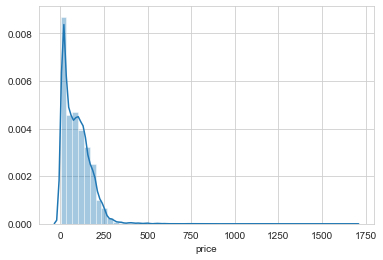

In [221]:
sns.distplot( a=sales.price, hist=True, kde=True, rug=False )

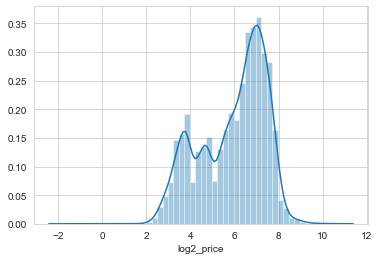

In [222]:
sns.distplot( a=sales.log2_price, hist=True, kde=True, rug=False )

In [223]:
timeDiff = sales["blockTime"] -  sales["blockTime"].min()
sales['timeDiff'] = timeDiff.dt.seconds
sales.tail(2)

,Unnamed: 0,signature,type,source,tokenMint,collection,slot,blockTime,buyer,buyerReferral,seller,sellerReferral,price,log2_price,day,daily_median_price,daily_median_floor,hour,SOL_USD,timeDiff
17223,21,274mjbC1SCw9CQGhvKf9k1tnBbKba75AkwsrVDDHiBKBXf...,buyNow,magiceden_v2,i3Qdb1vGY26nuCA16ogH2AUG9AFjFVyqj7ya4S6YfsD,okay_bears,131447231,2022-04-26 20:12:52,EajhaV9RY8YvaDn66Cw5vS9BicLiycfpQtbQZ1bsUXjs,NaN,8LgUFPXhRnFizDBuAxhL4etXk6t1ML5jKKeFXC62n4EH,NaN,7.0,2.807355,2022-04-26,14.0,7.0,2022-04-26 20:00:00,96.61,43
17224,22,3RQfREknqXZQfCQEUDeMe1c2MKYLERZ6swhm4ryJ6MwMRA...,buyNow,magiceden_v2,4ZaTRSqmFR9mWiRvK4dKPHwf1pupe5QR3QSVjWzwi3NQ,okay_bears,131447175,2022-04-26 20:12:09,9trTa2wW2MtrWX5NX3Yc1DBJDXndJpHEwjCKVH1e5hjp,NaN,2afvWUA3wXWcEQdXVP5cg5fqSUiwZDFx2Ckn5U3TydAT,NaN,4.5,2.169925,2022-04-26,14.0,7.0,2022-04-26 20:00:00,96.61,0


In [234]:
# join the sales and rarity dataframes on name
sales_rarity = sales.merge(bears_rarity[rarity_cols],left_on='tokenMint', right_on="mint")


In [235]:
# drop columns Unnamed: 0, dex, signature
sales_rarity.columns
sales_rarity.drop(columns=['Unnamed: 0', 'signature', 'type', 'source', 'tokenMint', 'collection',
       'slot', 'blockTime', 'buyer', 'buyerReferral', 'seller',
       'sellerReferral','mint','day','hour'], inplace=True)


In [242]:
#define target varaible as price in solana 

y = sales_rarity.price
y_log2 = sales_rarity.log2_price
preprocess_df = sales_rarity.copy()
preprocess_df.drop(columns=['log2_price','price'], inplace=True)


In [303]:
preprocess_df


,daily_median_price,daily_median_floor,SOL_USD,timeDiff,Background_rarity,Clothes_rarity,Eyes_rarity,Eyewear_rarity,Fur_rarity,Hat_rarity,Mouth_rarity,rarity_rank,overall_rarity,min_rarity,mean_rarity,trait_n_4,trait_n_5,trait_n_6,trait_n_7
0,0.189922,0.374824,-2.440139,0.216647,1.974633,-0.753347,-0.148469,0.655563,-0.116970,1.605610,1.621866,1.026810,-0.082926,-1.454749,1.329256,0,1,0,0
1,0.167416,0.332096,-2.521342,1.724003,1.974633,-0.753347,-0.148469,0.655563,-0.116970,1.605610,1.621866,1.026810,-0.082926,-1.454749,1.329256,0,1,0,0
2,-0.305992,-0.250114,0.790423,-0.321517,1.974633,-0.753347,-0.148469,0.655563,-0.116970,1.605610,1.621866,1.026810,-0.082926,-1.454749,1.329256,0,1,0,0
3,0.189922,0.374824,-2.440139,0.200288,0.267102,-0.489754,-0.688317,0.655563,-1.456596,-0.765633,-1.081150,-1.666247,-0.226471,-1.097345,-0.374387,0,0,1,0
4,-0.305992,-0.250114,0.698298,1.462864,0.267102,-0.489754,-0.688317,0.655563,-1.456596,-0.765633,-1.081150,-1.666247,-0.226471,-1.097345,-0.374387,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,-1.136396,-1.069378,0.658408,-1.221561,-1.676858,1.934186,-0.404897,0.655563,-1.284297,1.605610,-0.206823,1.429562,0.424196,0.783727,1.203285,1,0,0,0
17221,-1.136396,-1.069378,0.658408,-1.224833,1.974633,-0.521832,0.474043,-1.493569,1.222657,1.605610,-0.890763,-0.223051,-0.214976,0.106541,-0.854839,0,0,1,0
17222,-1.136396,-1.069378,0.658408,-1.226941,-1.676858,-0.272186,-1.398554,0.655563,-1.538438,1.605610,1.621866,0.591893,-0.173657,-0.326105,0.965646,0,1,0,0
17223,-1.136396,-1.069378,0.658408,-1.231558,0.267102,1.934186,1.678579,-1.483618,-1.723660,1.605610,1.621866,0.831028,-0.138779,-1.134967,0.101501,0,1,0,0


In [244]:
cat_vars = ['trait_n']
num_cols = ['timeDiff', 'Background_rarity', 'Clothes_rarity', 'Eyes_rarity',
       'Eyewear_rarity', 'Fur_rarity', 'Hat_rarity', 'Mouth_rarity',
       'rarity_rank', 'overall_rarity', 'min_rarity', 'mean_rarity',
       'daily_median_price', 'daily_median_floor', 'SOL_USD']


In [245]:
#create binary dummary varaib
preprocess_df = pd.get_dummies(preprocess_df, columns=cat_vars   )
preprocess_df.shape

(17225, 19)

In [246]:
#scale numeric variables
ss = StandardScaler()
ss= ss.fit(preprocess_df[num_cols])
preprocess_df[num_cols] = ss.transform(preprocess_df[num_cols])


In [247]:
preprocess_df.head(8)

,daily_median_price,daily_median_floor,SOL_USD,timeDiff,Background_rarity,Clothes_rarity,Eyes_rarity,Eyewear_rarity,Fur_rarity,Hat_rarity,Mouth_rarity,rarity_rank,overall_rarity,min_rarity,mean_rarity,trait_n_4,trait_n_5,trait_n_6,trait_n_7
0,0.189922,0.374824,-2.440139,0.216647,1.974633,-0.753347,-0.148469,0.655563,-0.116970,1.605610,1.621866,1.026810,-0.082926,-1.454749,1.329256,0,1,0,0
1,0.167416,0.332096,-2.521342,1.724003,1.974633,-0.753347,-0.148469,0.655563,-0.116970,1.605610,1.621866,1.026810,-0.082926,-1.454749,1.329256,0,1,0,0
2,-0.305992,-0.250114,0.790423,-0.321517,1.974633,-0.753347,-0.148469,0.655563,-0.116970,1.605610,1.621866,1.026810,-0.082926,-1.454749,1.329256,0,1,0,0
3,0.189922,0.374824,-2.440139,0.200288,0.267102,-0.489754,-0.688317,0.655563,-1.456596,-0.765633,-1.081150,-1.666247,-0.226471,-1.097345,-0.374387,0,0,1,0
4,-0.305992,-0.250114,0.698298,1.462864,0.267102,-0.489754,-0.688317,0.655563,-1.456596,-0.765633,-1.081150,-1.666247,-0.226471,-1.097345,-0.374387,0,0,1,0
5,-1.136396,-1.069378,0.664582,-1.060980,0.267102,-0.489754,-0.688317,0.655563,-1.456596,-0.765633,-1.081150,-1.666247,-0.226471,-1.097345,-0.374387,0,0,1,0
6,0.189922,0.374824,-2.507571,-0.127345,0.240832,-0.722665,-0.106293,-1.494255,-0.116970,1.605610,1.621866,-0.146136,-0.213192,-1.247831,-0.582816,0,0,1,0
7,1.435372,1.231091,-1.451928,-0.766831,0.240832,-0.722665,-0.106293,-1.494255,-0.116970,1.605610,1.621866,-0.146136,-0.213192,-1.247831,-0.582816,0,0,1,0


In [248]:
# create train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    preprocess_df, y, test_size=0.175, random_state=42
)


print(f"train set has {x_train.shape[0]} datapoints and test set has {x_test.shape[0]} datapoints")


train set has 14210 datapoints and test set has 3015 datapoints


In [297]:
xgb_model = xgb.XGBRegressor(
    n_estimators=1500,max_depth=10
)
#fit the model
xgb_model.fit(x_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [298]:
#prediction on test set
xgb_ypred = xgb_model.predict(x_test)
#xgb_ypred = 2**xgb_ypred_log2
MAPE(predicted=xgb_ypred, actual=y_test)

--------------------------------
Testing Model Absolute Percentage error (APE)
Median APE (MAPE) = 4.52%
Mean APE  = 10.72 %
25th percentile APE = 1.94 %
75th percentile APE = 9.07 %


In [299]:
#calculate MSE
xgb_mse = MSE(y_test, xgb_ypred)
print(f"XGBoost Mean-squared Error = {xgb_mse} SOL")

XGBoost Mean-squared Error = 762.887120021208 SOL


In [300]:
best_n = 30
feat_imp = xgb_model.feature_importances_
sorted_idx = feat_imp.argsort()[::-1][0:best_n]

feat_imp[sorted_idx]

array([0.42286754, 0.35245273, 0.10930484, 0.04384096, 0.02710291,
       0.01420855, 0.00778542, 0.00327397, 0.00274159, 0.0025895 ,
       0.00248307, 0.00202859, 0.00198995, 0.00187348, 0.00181758,
       0.00139086, 0.00119976, 0.0010487 , 0.        ], dtype=float32)

Text(0.5, 0, 'Xgboost Feature Importance')

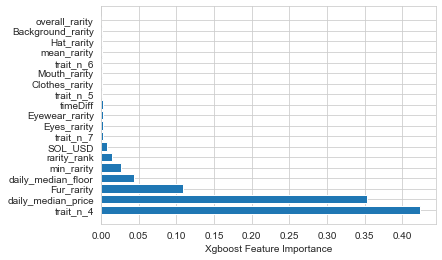

In [301]:
from matplotlib import pyplot as plt 

plt.barh(x_train.columns[sorted_idx], feat_imp[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [302]:
fig = px.scatter(x=xgb_ypred, y=y_test, trendline="ols",opacity =0.3, 
        labels={
                     "x": "Predicted Sale Price (SOL)",
                     "y": "Actual Sale Price (SOL)"
                 })
fig.show()

In [317]:
### make predictions based off model

x_predict = bears_rarity.copy()
### add some sales-related metadata 
#
latest_sale = sales[sales.timeDiff ==sales.timeDiff.max()].reset_index(drop=True)
for trait in ['timeDiff','SOL_USD','daily_median_price','daily_median_floor']:
    x_predict[trait] = latest_sale[trait][0]

#get trained columns
trained_vars = x_train.columns.to_list()

x_predict = pd.get_dummies(x_predict, columns =cat_vars)


x_predict = x_predict[['name']+trained_vars]
x_predict[num_cols] = ss.transform(x_predict[num_cols])
x_predict['pred_SOL'] = xgb_model.predict(x_predict[trained_vars])


x_predict.head()



,name,daily_median_price,daily_median_floor,SOL_USD,timeDiff,Background_rarity,Clothes_rarity,Eyes_rarity,Eyewear_rarity,Fur_rarity,...,Mouth_rarity,rarity_rank,overall_rarity,min_rarity,mean_rarity,trait_n_4,trait_n_5,trait_n_6,trait_n_7,pred_SOL
0,Okay Bear #3340,0.664106,0.385523,0.48223,1.907923,0.372181,-0.558093,-0.602278,-1.575238,-1.723660,...,-1.115105,-1.849094,-0.226700,-1.360695,-2.388087,0,0,0,1,418.571289
1,Okay Bear #8003,0.664106,0.385523,0.48223,1.907923,0.030674,-0.644563,-1.295646,-1.616416,-1.038771,...,-0.656719,-1.848744,-0.226699,-1.332479,-2.390217,0,0,0,1,360.690674
2,Okay Bear #845,0.664106,0.385523,0.48223,1.907923,-1.676858,-0.661299,-1.158997,-1.571120,-1.284297,...,-1.036282,-1.848395,-0.226697,-0.833995,-2.437380,0,0,0,1,387.641632
3,Okay Bear #5106,0.664106,0.385523,0.48223,1.907923,0.030674,-0.644563,-0.106293,-1.575238,-1.766735,...,-0.756157,-1.848045,-0.226696,-1.323074,-2.250250,0,0,0,1,429.966125
4,Okay Bear #9886,0.664106,0.385523,0.48223,1.907923,1.974633,-0.638984,-0.602278,-1.494255,-1.766735,...,-1.113892,-1.847695,-0.226696,-1.351290,-2.206738,0,0,0,1,410.428131


In [323]:
pred_price = bears_rarity.merge( x_predict[['name','pred_SOL']],on='name').sort_values('pred_SOL',ascending=False)
pred_price.to_csv('data/okay_bear/okay_bears_pred.csv')

In [326]:
xgb2 = xgb.XGBRegressor(nthread=-1,seed=42,objective ="reg:squarederror" )

xg_grid = GridSearchCV(xgb2, 
                       param_grid={'n_estimators':[500,1750],
                                    'max_depth': [2,6,8,10,12,14],
                                    'subsample':[0.2,0.5,0.7,0.95,1.0],
                                    'colsample_bytree':[0.3,0.7,0.9,1.0],
                                    'eta':[0.01,0.1,0.25,0.5],
                                    'learning_rate':[0.1,0.3,0.4]},
                        cv=10, n_jobs=-1,scoring='neg_mean_absolute_error')


#fit the model
xg_grid.fit(x_train, y_train)



In [247]:
xg_grid.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.5,
 'max_depth': 6,
 'n_estimators': 1500,
 'subsample': 0.2}

In [250]:
xg_grid.best_score_

0.9999961069959463

Text(0.5, 0, 'Xgboost Feature Importance')

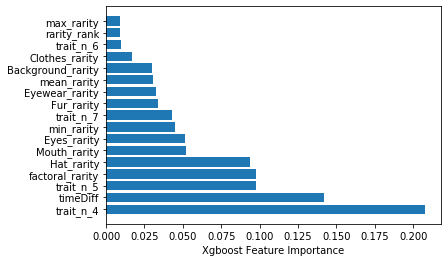

In [251]:

feat_imp = xg_grid.best_estimator_.feature_importances_
sorted_idx = feat_imp.argsort()[::-1]

plt.barh(x_train[cols2fit].columns[sorted_idx], feat_imp[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [252]:
fig = px.scatter(x=xgb2_ypred, y=y_test)
fig.show()

In [254]:
print(f"max = {y.max()}, mean = {y.min()}, mean = {y.mean()}, median = {y.median()}")

max = 666.66, mean = 6.49, mean = 118.69156945758608, median = 112.5


,name,Background,Clothes,Eyes,Eyewear,Fur,Hat,Mouth,trait_n,mean_rarity,rarity_rank,predicted_SOL
52,Okay Bear #9638,Warm Grey,NaN,Interested,NaN,Tan,NaN,Cassette,4,0.209586,53,645.875732
9041,Okay Bear #9989,Green,NaN,White Glow,NaN,Tan,NaN,Oou,4,0.208857,9042,465.047455
9341,Okay Bear #2373,Blue,NaN,White Glow,NaN,Tan,NaN,Huh,4,0.209786,9342,442.157379
9331,Okay Bear #1726,Warm Grey,NaN,White Glow,NaN,Tan,NaN,Huh,4,0.209429,9332,439.765839
9224,Okay Bear #8057,Yellow,NaN,Closed,NaN,Tan,NaN,Huh,4,0.208914,9225,421.374817
9182,Okay Bear #8352,Cream,NaN,Golden Glow,NaN,Tan,NaN,Clean Smile,4,0.215286,9183,419.339569
9160,Okay Bear #1478,Purple,NaN,Golden Glow,NaN,Grizzly,NaN,Clean Smile,4,0.213686,9161,414.372894
9697,Okay Bear #2362,White,NaN,Closed,NaN,Polar,NaN,Okay,4,0.226514,9698,410.850800
9173,Okay Bear #8134,Blue,NaN,Golden Glow,NaN,Grizzly,NaN,Clean Smile,4,0.214614,9174,410.083466
9806,Okay Bear #9544,Blue,NaN,White Glow,NaN,Sand,NaN,Okay,4,0.229300,9807,403.100006


In [290]:
predict_SOL.predicted_SOL.median()
predict_SOL.to_csv('data/okay_bear/okay_bears_pred.csv')